In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from sklearn.preprocessing import StandardScaler
import sklearn.manifold
import glob
import sklearn.cluster

In [29]:
imagenes = []
labels = []
loc = ['Linnaeus/berry/*.jpg', 'Linnaeus/bird/*.jpg', 'Linnaeus/dog/*.jpg', 'Linnaeus/flower/*.jpg'] #Linnaeus database

for i in range(0,4):
    names = glob.glob(loc[i])
    for element in names:
        image_ = np.float_(image.imread(element))
        imagenes.append(image_)
        labels.append(i) # 0 berry, 1 bird, 2 dog, 3 flower

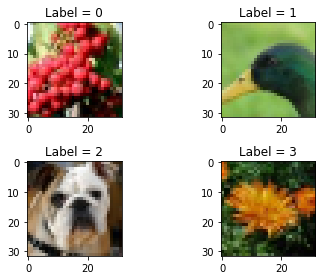

In [30]:
ii = [0,400,700,1000]

for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.imshow(np.int_(imagenes[ii[i]]))
    plt.title('Label = {}'.format(labels[ii[i]]))
plt.tight_layout()

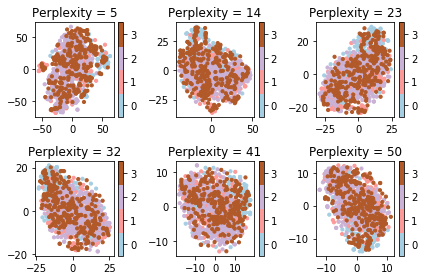

In [31]:
x = np.array(imagenes).reshape((len(imagenes),-1))
per = np.int_(np.linspace(5,50,6))

for i in range(0,6):
    tsne = sklearn.manifold.TSNE(perplexity=per[i])
    tsne.fit(x)
    embedding = tsne.embedding_
    plt.subplot(2,3,i+1)
    plt.scatter(embedding[:,0], embedding[:,1], c = labels, cmap='Paired', s=10.0)
    plt.colorbar(boundaries=np.arange(5)-0.5).set_ticks(np.arange(4))
    plt.title('Perplexity = {}'.format(int(per[i])))
plt.tight_layout()

Pareciera que con perplexity = 5, se encuentra un cluster pequeño de imágenes de aves. Este se puede ver en la parte izquierda de la gráfica. Ademas, parece que todos los valores de perplexity se encuentra un cluster de berries. Aun así, la separación no es buena. En las siguiente celdas se intentará probar con escala de grises.

In [32]:
pesos = [0.2989, 0.5870, 0.1140]
imagenes_g = []

for element in imagenes:
    image_g = np.dot(element[...,:3], pesos)
    imagenes_g.append(image_g)

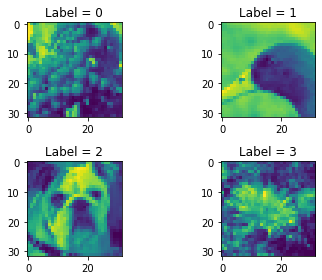

In [33]:
ii = [0,400,700,1000]

for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.imshow(np.int_(imagenes_g[ii[i]]))
    plt.title('Label = {}'.format(labels[ii[i]]))
plt.tight_layout()

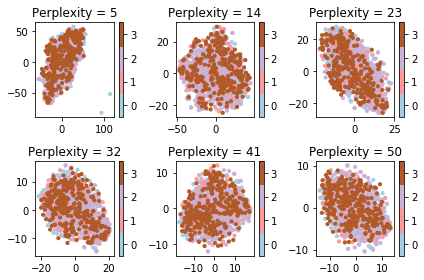

In [35]:
x_g = np.array(imagenes_g).reshape((len(imagenes_g),-1))
per = np.int_(np.linspace(5,50,6))

for i in range(0,6):
    tsne = sklearn.manifold.TSNE(perplexity=per[i])
    tsne.fit(x_g)
    embedding = tsne.embedding_
    plt.subplot(2,3,i+1)
    plt.scatter(embedding[:,0], embedding[:,1], c = labels, cmap='Paired', s=10.0)
    plt.colorbar(boundaries=np.arange(5)-0.5).set_ticks(np.arange(4))
    plt.title('Perplexity = {}'.format(int(per[i])))
plt.tight_layout()

Realmente los cambios no son muy significativos, con perplexity = 5, se ve que hay unos puntos bastante separados del resto. Pero es difícil poder encontrar clusters claros en estas gráficas. Ahora bien, considerando los resultados obtenidos, se intentara llevar a cabo un clustering by k-means para un perplexity de 14 en el caso RGB, y con un perplexity de 32 para la escala de grises.

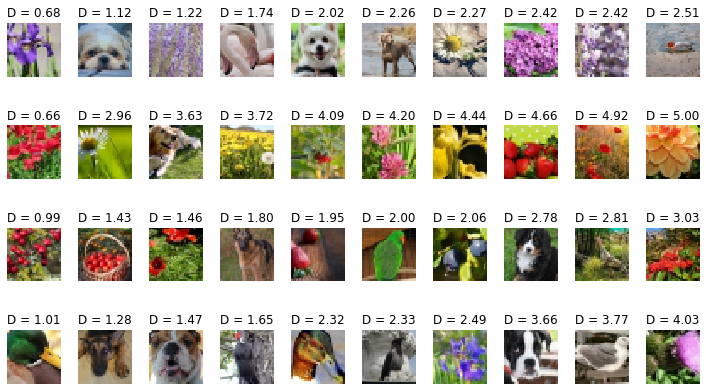

In [40]:
tsne = sklearn.manifold.TSNE(perplexity=14)
tsne.fit(x)
embedding = tsne.embedding_

n_clusters = 4
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding)
cluster = k_means.predict(embedding)
distance = k_means.transform(embedding)

plt.figure(figsize=(10,6))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i])
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(np.int_(imagenes[ind]))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')
plt.tight_layout()

Entonces, se puede ver que la clasificación no es buena. Ya que en ningún momento se encuentran los clusters de las categorias que se plantearon. Ahora, solo por verificar, se intentará con las imágenes en escalas de grises.

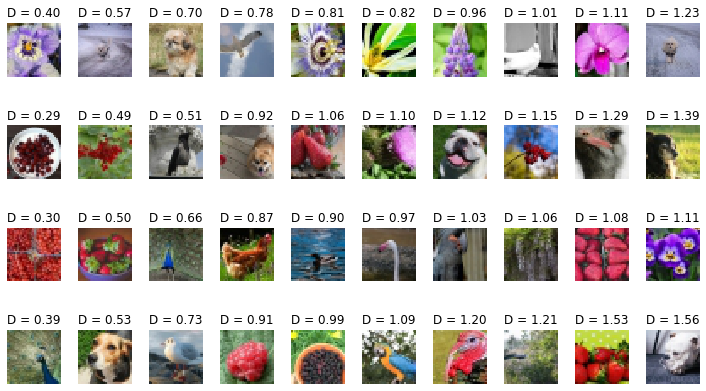

In [43]:
tsne = sklearn.manifold.TSNE(perplexity=32)
tsne.fit(x_g)
embedding = tsne.embedding_

n_clusters = 4
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding)
cluster = k_means.predict(embedding)
distance = k_means.transform(embedding)
for i in range(n_clusters):
    ii = np.argsort(distance[:,i])
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(np.int_(imagenes[ind]))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')
plt.tight_layout()

La clasificación, como se puede ver, tampoco es buena. Entonces, la falla de t-sne para clasificar estas imágenes se puede deber a varias cosas. Primero que todo, es importante mencionar que las imágenes encontradas no están centradas. Es decir, se ve claramente que cada imágen tiene la posición del objeto en diferentes lugares. Esto, claramente es una limitante para este tipo de algoritmos. Así mismo, se puede ver que, de alguna manera, al usar las imágenes a color, se encuentran que los clusters están relacionados con los colores más no con los objetos que están en las figuras. Por ejemplo, en el segundo cluster se ve que las figuras están rodeadas de verde (o uno de sus colores más predominantes están entre el verde y el amarillo), y en el primer cluster se ven fondos claros. Con esto, es claro ver que se necesitarian algoritmos más complejos para poder clasificar de mejor manera estas imágenes.